In [1]:
import torch
from model import LUNet
from matplotlib import pyplot as plt
import numpy as np

from torch.optim.lr_scheduler import StepLR
from train import training_routine_gaussian, training_routine_uniform, training_routine_uniform_method2
from test import testing_routine
from functions import uniform_circle_log_likelihood, uniform_circle_log_likelihood_method2, gaussian_loss_function

from pathlib import Path

from visuals import plot_transformed_grid_and_density, compute_uniform_circle_density, compute_gaussian_density

In [2]:
torch.set_default_dtype(torch.float64)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

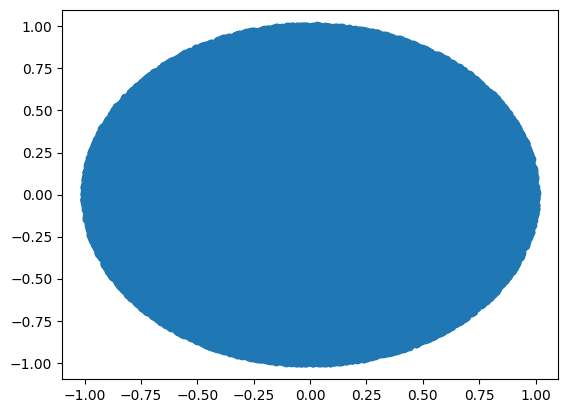

In [11]:
def generate_ellipse(max_num = 10000, scale=(0.5,0.2), device='cpu'):
    data = (torch.rand((max_num,2), device=device)-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale, device=device)
    return data

training_set = generate_ellipse(max_num=100000, scale=(1.,1.), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(1.,1.), device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])


# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [97]:
model_circle = LUNet(num_lu_blocks=3, layer_size = 2).to(device)

In [121]:
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 50
#init_loss_dict(num_epochs) # number of epochs

In [122]:
scheduler.get_last_lr()

[0.1]

In [123]:
%%time

train_with_grid_penalty = False

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_circle, train_loader, optimizer)
    testing_routine(model_circle, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

77it [00:01, 62.64it/s]
62it [00:00, 348.31it/s]


Test set: Average loss: 76.0530


77it [00:01, 76.31it/s]
62it [00:00, 348.32it/s]


Test set: Average loss: 74.5893


77it [00:01, 71.10it/s]
62it [00:00, 346.37it/s]


Test set: Average loss: 74.9156


77it [00:01, 68.87it/s]
62it [00:00, 336.96it/s]


Test set: Average loss: 75.0644


77it [00:01, 68.38it/s]
62it [00:00, 344.45it/s]


Test set: Average loss: 75.2133


77it [00:01, 70.45it/s]
62it [00:00, 342.54it/s]


Test set: Average loss: 75.5321


77it [00:01, 72.95it/s]
62it [00:00, 333.29it/s]


Test set: Average loss: 74.6110


77it [00:00, 77.39it/s]
62it [00:00, 340.66it/s]


Test set: Average loss: 75.2010


77it [00:01, 72.30it/s]
62it [00:00, 342.54it/s]


Test set: Average loss: 74.7381


77it [00:01, 68.93it/s]
62it [00:00, 346.37it/s]


Test set: Average loss: 75.7032


77it [00:01, 71.43it/s]
62it [00:00, 346.37it/s]


Test set: Average loss: 74.0364


77it [00:01, 69.34it/s]
62it [00:00, 340.64it/s]


Test set: Average loss: 74.2122


77it [00:01, 68.51it/s]
62it [00:00, 340.66it/s]


Test set: Average loss: 73.6627


77it [00:01, 68.32it/s]
62it [00:00, 324.61it/s]


Test set: Average loss: 73.1422


77it [00:01, 70.26it/s]
62it [00:00, 344.45it/s]


Test set: Average loss: 76.8571


77it [00:01, 71.82it/s]
62it [00:00, 350.29it/s]


Test set: Average loss: 74.4321


77it [00:01, 69.77it/s]
62it [00:00, 338.80it/s]


Test set: Average loss: 74.2281


77it [00:01, 68.08it/s]
62it [00:00, 326.27it/s]


Test set: Average loss: 73.7890


77it [00:01, 68.35it/s]
62it [00:00, 346.37it/s]


Test set: Average loss: 74.0232


77it [00:01, 68.56it/s]
62it [00:00, 336.96it/s]


Test set: Average loss: 75.0291


77it [00:01, 66.95it/s]
62it [00:00, 342.54it/s]


Test set: Average loss: 73.1828


77it [00:01, 72.03it/s]
62it [00:00, 340.66it/s]


Test set: Average loss: 73.0506


77it [00:01, 76.85it/s]
62it [00:00, 352.27it/s]


Test set: Average loss: 74.2668


77it [00:00, 77.54it/s]
62it [00:00, 344.45it/s]


Test set: Average loss: 72.9728


77it [00:01, 71.56it/s]
62it [00:00, 329.74it/s]


Test set: Average loss: 72.7251


77it [00:01, 69.31it/s]
62it [00:00, 339.71it/s]


Test set: Average loss: 73.2577


77it [00:01, 71.96it/s]
62it [00:00, 338.80it/s]


Test set: Average loss: 74.9785


77it [00:01, 68.74it/s]
62it [00:00, 346.37it/s]


Test set: Average loss: 74.1059


77it [00:01, 69.81it/s]
62it [00:00, 340.66it/s]


Test set: Average loss: 72.7688


77it [00:01, 69.34it/s]
62it [00:00, 344.45it/s]


Test set: Average loss: 72.7673


77it [00:01, 69.87it/s]
62it [00:00, 336.96it/s]


Test set: Average loss: 73.4160


77it [00:01, 58.96it/s]
62it [00:00, 331.55it/s]


Test set: Average loss: 72.9197


77it [00:01, 67.54it/s]
62it [00:00, 338.80it/s]


Test set: Average loss: 72.8669


77it [00:01, 67.34it/s]
62it [00:00, 352.27it/s]


Test set: Average loss: 73.6389


77it [00:01, 75.34it/s]
62it [00:00, 362.58it/s]


Test set: Average loss: 73.0658


77it [00:00, 77.70it/s]
62it [00:00, 358.38it/s]


Test set: Average loss: 72.9504


77it [00:01, 73.54it/s]
62it [00:00, 338.80it/s]


Test set: Average loss: 72.9113


77it [00:01, 71.03it/s]
62it [00:00, 335.13it/s]


Test set: Average loss: 73.1096


77it [00:01, 72.44it/s]
62it [00:00, 321.21it/s]


Test set: Average loss: 72.6395


77it [00:01, 73.68it/s]
62it [00:00, 341.38it/s]


Test set: Average loss: 72.9633


77it [00:01, 69.89it/s]
62it [00:00, 354.29it/s]


Test set: Average loss: 72.6965


77it [00:01, 72.16it/s]
62it [00:00, 344.45it/s]


Test set: Average loss: 72.5967


77it [00:01, 69.30it/s]
62it [00:00, 300.97it/s]


Test set: Average loss: 72.7017


77it [00:01, 74.47it/s]
62it [00:00, 350.28it/s]


Test set: Average loss: 72.5416


77it [00:01, 67.07it/s]
62it [00:00, 250.00it/s]


Test set: Average loss: 72.9425


77it [00:01, 66.84it/s]
62it [00:00, 259.42it/s]


Test set: Average loss: 73.1106


77it [00:01, 67.25it/s]
62it [00:00, 248.00it/s]


Test set: Average loss: 72.8544


77it [00:01, 66.90it/s]
62it [00:00, 255.14it/s]


Test set: Average loss: 72.5865


77it [00:01, 66.01it/s]
62it [00:00, 261.60it/s]


Test set: Average loss: 72.5648


77it [00:01, 64.76it/s]
62it [00:00, 243.14it/s]

Test set: Average loss: 72.7054
CPU times: total: 3min 3s
Wall time: 1min 4s


0

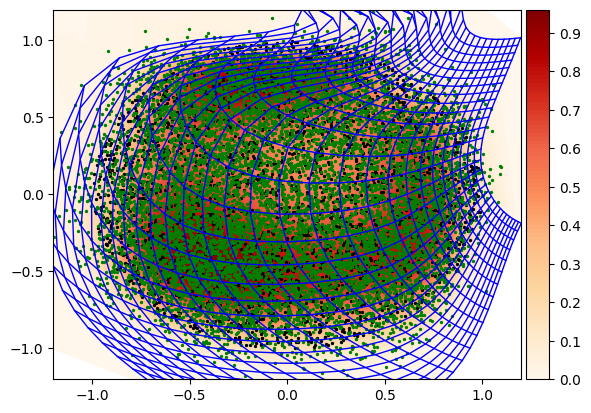

In [124]:
scale = 1.2
factor = 3

sampling_data =  torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_circle, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-scale, scale), y_lim=(-scale, scale),
                                 density_function=compute_gaussian_density)

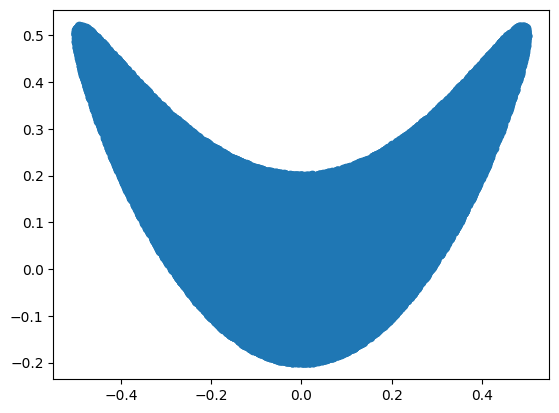

In [126]:
def generate_banana(n=100000, device=device):
    train_loader = generate_ellipse(n, device=device)
    train_loader[:, 1] = train_loader[:,1] + 2*train_loader[:,0]**2
    return train_loader
training_set = generate_banana(n=100000, device=device)
validation_set = generate_banana(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [254]:
model_banana = LUNet(num_lu_blocks=7, layer_size = 2).to(device)

In [255]:
optimizer = torch.optim.SGD(model_banana.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 20
#init_loss_dict(num_epochs) # number of epochs

In [220]:
scheduler.get_last_lr()

[0.08]

In [256]:
%%time

train_with_grid_penalty = False

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_banana, train_loader, optimizer)
    testing_routine(model_banana, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

77it [00:02, 37.61it/s]
62it [00:00, 194.95it/s]


Test set: Average loss: 1357.2609


77it [00:01, 44.34it/s]
62it [00:00, 191.93it/s]


Test set: Average loss: 843.1170


77it [00:01, 42.83it/s]
62it [00:00, 189.58it/s]


Test set: Average loss: 490.4741


77it [00:01, 43.23it/s]
62it [00:00, 187.86it/s]


Test set: Average loss: 231.3607


77it [00:01, 42.35it/s]
62it [00:00, 190.18it/s]


Test set: Average loss: 49.5175


77it [00:01, 42.45it/s]
62it [00:00, 191.95it/s]


Test set: Average loss: -29.0812


77it [00:01, 42.87it/s]
62it [00:00, 192.53it/s]


Test set: Average loss: -62.6090


77it [00:01, 43.09it/s]
62it [00:00, 191.95it/s]


Test set: Average loss: -80.0569


77it [00:01, 42.45it/s]
62it [00:00, 192.53it/s]


Test set: Average loss: -93.2909


77it [00:01, 43.38it/s]
62it [00:00, 191.36it/s]


Test set: Average loss: -102.4959


77it [00:01, 42.47it/s]
62it [00:00, 192.53it/s]


Test set: Average loss: -113.3683


77it [00:01, 43.04it/s]
62it [00:00, 185.06it/s]


Test set: Average loss: -122.1562


77it [00:01, 43.26it/s]
62it [00:00, 187.86it/s]


Test set: Average loss: -131.3050


77it [00:01, 42.29it/s]
62it [00:00, 188.43it/s]


Test set: Average loss: -137.0134


77it [00:01, 42.80it/s]
62it [00:00, 193.15it/s]


Test set: Average loss: -143.6353


77it [00:01, 42.61it/s]
62it [00:00, 190.18it/s]


Test set: Average loss: -148.9257


77it [00:01, 43.26it/s]
62it [00:00, 190.77it/s]


Test set: Average loss: -152.0174


77it [00:01, 43.23it/s]
62it [00:00, 186.17it/s]


Test set: Average loss: -153.7908


77it [00:01, 42.15it/s]
62it [00:00, 189.02it/s]


Test set: Average loss: -157.8040


77it [00:01, 42.75it/s]
62it [00:00, 193.13it/s]

Test set: Average loss: -159.8523
CPU times: total: 1min 32s
Wall time: 42.7 s


0

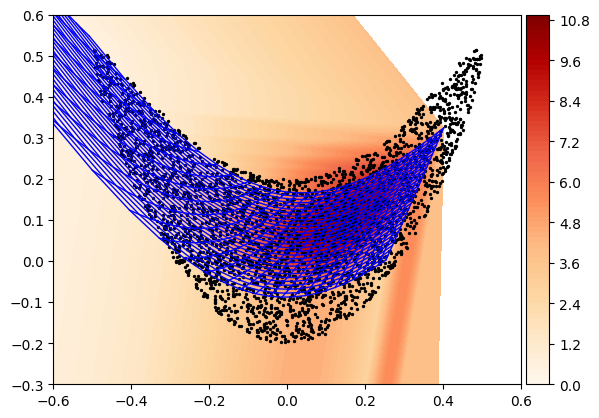

In [257]:
scale = 1.2
factor = 1.

sampling_data =  torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_banana, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-0.5*scale, 0.5*scale), y_lim=(-0.25*scale, 0.5*scale),
                                 density_function=compute_gaussian_density)

In [252]:
sampling_data = generate_ellipse(10000, (1., 1.), device=device) 
with torch.no_grad():
    transformed = model_banana(model_circle(sampling_data), reverse=True)

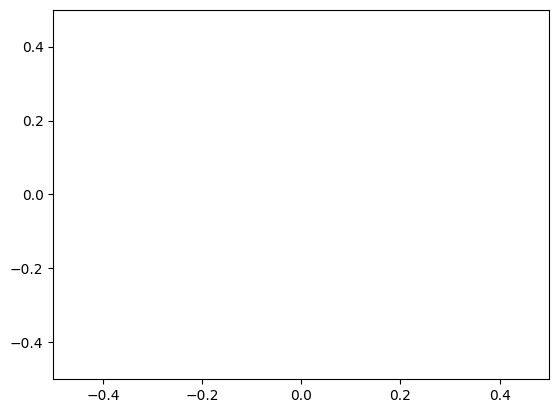

In [253]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-0.5*scale,0.5*scale)
y_lim=(-0.5*scale,0.5*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)

In [ ]:
def generate_wave(n=100000, device='cpu'):
    train_loader = generate_ellipse(n, (1,1), device)
    train_loader[:, 1] = train_loader[:,1] + 2*torch.sin(3*train_loader[:,0])
    return train_loader
training_set = generate_wave(n=100000, device=device)
validation_set = generate_wave(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

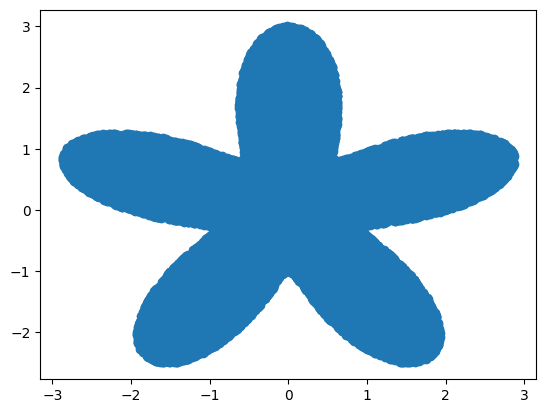

In [258]:
def generate_star(max_num = 10000, n_edges = 5, device='cpu'):
    data = generate_ellipse(max_num, scale=(3,3), device=device)
    angles = torch.arctan2(data[:,1],data[:,0])
    max_amplitude = torch.sin(n_edges*angles)+2
    amplitude = torch.sum(data**2,axis=1)**0.5
    data = data[amplitude <= max_amplitude]
    return data

training_set = generate_star(max_num=100000, n_edges=5, device=device)
validation_set = generate_star(max_num=10000, n_edges=5, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [283]:
model_star = LUNet(num_lu_blocks=20, layer_size = 2).to(device)

In [284]:
optimizer = torch.optim.SGD(model_star.parameters(), lr=0.1, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epochs = 50
#init_loss_dict(num_epochs) # number of epochs

In [285]:
%%time

train_with_grid_penalty = False

for epoch in range(1, num_epochs + 1):
    training_routine_gaussian(model_star, train_loader, optimizer)
    testing_routine(model_star, validation_loader,loss_function=gaussian_loss_function)
    scheduler.step()

39it [00:02, 17.89it/s]
31it [00:00, 75.97it/s]


Test set: Average loss: 2072.4620


39it [00:01, 19.57it/s]
31it [00:00, 77.69it/s]


Test set: Average loss: 563.5044


39it [00:02, 19.35it/s]
31it [00:00, 78.28it/s]


Test set: Average loss: 541.6977


39it [00:01, 20.52it/s]
31it [00:00, 76.35it/s]


Test set: Average loss: 531.9089


39it [00:01, 19.85it/s]
31it [00:00, 78.67it/s]


Test set: Average loss: 549.8648


39it [00:01, 20.42it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 514.6734


39it [00:01, 20.18it/s]
31it [00:00, 78.87it/s]


Test set: Average loss: 515.0792


39it [00:01, 20.14it/s]
31it [00:00, 75.60it/s]


Test set: Average loss: 498.4377


39it [00:01, 20.38it/s]
31it [00:00, 75.79it/s]


Test set: Average loss: 493.2847


39it [00:01, 19.59it/s]
31it [00:00, 73.63it/s]


Test set: Average loss: 482.9396


39it [00:01, 19.79it/s]
31it [00:00, 74.87it/s]


Test set: Average loss: 475.9061


39it [00:01, 20.17it/s]
31it [00:00, 74.69it/s]


Test set: Average loss: 466.8414


39it [00:01, 19.53it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 461.1857


39it [00:01, 19.92it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 454.3425


39it [00:01, 19.99it/s]
31it [00:00, 74.52it/s]


Test set: Average loss: 448.9119


39it [00:01, 19.81it/s]
31it [00:00, 71.59it/s]


Test set: Average loss: 443.6040


39it [00:02, 19.47it/s]
31it [00:00, 73.54it/s]


Test set: Average loss: 439.1880


39it [00:01, 19.74it/s]
31it [00:00, 75.79it/s]


Test set: Average loss: 435.2640


39it [00:01, 19.84it/s]
31it [00:00, 77.11it/s]


Test set: Average loss: 430.8834


39it [00:01, 19.73it/s]
31it [00:00, 76.35it/s]


Test set: Average loss: 428.5939


39it [00:01, 20.31it/s]
31it [00:00, 76.73it/s]


Test set: Average loss: 423.7679


39it [00:01, 19.67it/s]
31it [00:00, 76.35it/s]


Test set: Average loss: 422.2033


39it [00:01, 19.51it/s]
31it [00:00, 77.69it/s]


Test set: Average loss: 418.2077


39it [00:01, 19.96it/s]
31it [00:00, 75.79it/s]


Test set: Average loss: 416.5353


39it [00:01, 19.76it/s]
31it [00:00, 77.11it/s]


Test set: Average loss: 413.2003


39it [00:01, 19.87it/s]
31it [00:00, 78.09it/s]


Test set: Average loss: 412.4201


39it [00:01, 19.58it/s]
31it [00:00, 77.11it/s]


Test set: Average loss: 408.7194


39it [00:01, 19.68it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 407.9094


39it [00:01, 19.92it/s]
31it [00:00, 76.73it/s]


Test set: Average loss: 406.0150


39it [00:01, 19.54it/s]
31it [00:00, 75.98it/s]


Test set: Average loss: 404.6706


39it [00:01, 20.18it/s]
31it [00:00, 76.92it/s]


Test set: Average loss: 402.0561


39it [00:01, 19.74it/s]
31it [00:00, 75.79it/s]


Test set: Average loss: 401.7438


39it [00:01, 19.87it/s]
31it [00:00, 75.61it/s]


Test set: Average loss: 400.1314


39it [00:01, 19.97it/s]
31it [00:00, 78.28it/s]


Test set: Average loss: 398.3744


39it [00:02, 19.48it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 396.5801


39it [00:01, 19.88it/s]
31it [00:00, 75.93it/s]


Test set: Average loss: 395.8878


39it [00:02, 19.38it/s]
31it [00:00, 77.31it/s]


Test set: Average loss: 394.2015


39it [00:01, 19.66it/s]
31it [00:00, 76.17it/s]


Test set: Average loss: 393.8081


39it [00:01, 19.66it/s]
31it [00:00, 78.28it/s]


Test set: Average loss: 392.3647


39it [00:01, 19.89it/s]
31it [00:00, 79.28it/s]


Test set: Average loss: 391.8983


39it [00:01, 20.22it/s]
31it [00:00, 77.11it/s]


Test set: Average loss: 389.1575


39it [00:01, 20.00it/s]
31it [00:00, 76.35it/s]


Test set: Average loss: 387.6286


39it [00:01, 20.18it/s]
31it [00:00, 75.79it/s]


Test set: Average loss: 386.0715


39it [00:01, 19.56it/s]
31it [00:00, 76.73it/s]


Test set: Average loss: 384.5043


39it [00:01, 20.31it/s]
31it [00:00, 76.54it/s]


Test set: Average loss: 385.6704


39it [00:02, 19.26it/s]
31it [00:00, 77.49it/s]


Test set: Average loss: 384.0628


39it [00:01, 19.61it/s]
31it [00:00, 75.80it/s]


Test set: Average loss: 383.9197


39it [00:02, 19.40it/s]
31it [00:00, 76.73it/s]


Test set: Average loss: 380.5159


39it [00:01, 19.61it/s]
31it [00:00, 73.28it/s]


Test set: Average loss: 379.4806


39it [00:01, 19.90it/s]
31it [00:00, 75.24it/s]

Test set: Average loss: 379.0484
CPU times: total: 4min
Wall time: 1min 59s


0

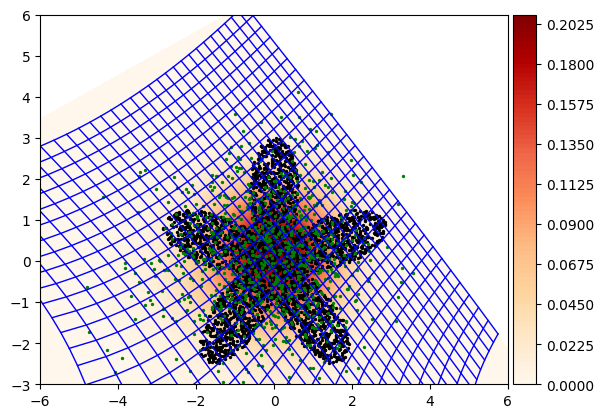

In [281]:
scale = 12
factor = 3

sampling_data =  torch.tensor(np.random.normal(size=(1000,2)))
plot_transformed_grid_and_density(model_star, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                 x_range=(-factor, factor), y_range=(-1.5*factor, 1.5*factor), x_lim=(-0.5*scale, 0.5*scale), y_lim=(-0.25*scale, 0.5*scale),
                                 density_function=compute_gaussian_density)